In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [74]:
prev_df = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\previous_application.csv")
curr_df = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\application_train.csv")

In [75]:
prev_df

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,Consumer loans,6030.675,133866.0,133866.0,0.0,133866.0,SATURDAY,15,Y,...,24.0,low_action,POS household without interest,365243.0,-801.0,-111.0,-531.0,-518.0,0.0,302680
1413697,1563733,Consumer loans,13726.080,137250.0,123525.0,13725.0,137250.0,SATURDAY,14,Y,...,10.0,low_normal,POS household with interest,365243.0,-464.0,-194.0,-194.0,-186.0,0.0,192560
1413698,2319569,Consumer loans,4716.495,46800.0,46800.0,0.0,46800.0,FRIDAY,9,Y,...,12.0,middle,POS industry with interest,365243.0,-119.0,211.0,365243.0,365243.0,0.0,91682
1413699,2829648,Consumer loans,10301.940,101745.0,112491.0,0.0,101745.0,FRIDAY,12,Y,...,12.0,low_action,POS household without interest,365243.0,-529.0,-199.0,-199.0,-194.0,0.0,126653


In [76]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [77]:
prev_df.duplicated().sum()

0

In [78]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(prev_df)

<Axes: xlabel='Percentage', ylabel='Feature'>

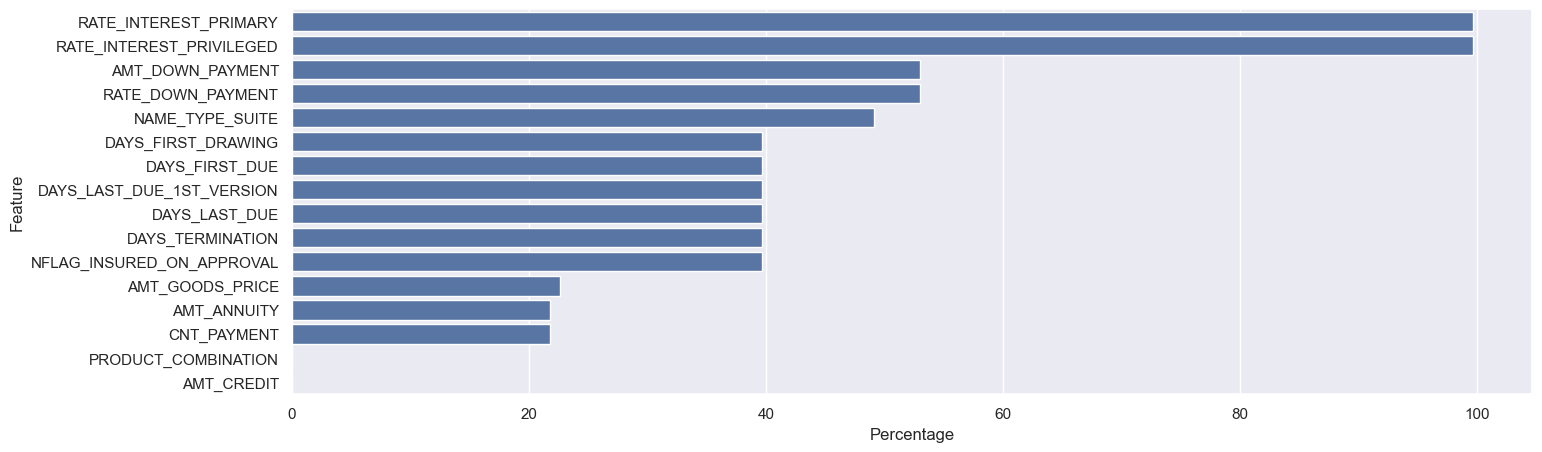

In [79]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [80]:
prev_df["AMT_CREDIT"].fillna(0, inplace=True)
prev_df["PRODUCT_COMBINATION"].fillna(prev_df["PRODUCT_COMBINATION"].mode()[0], inplace= True)

In [81]:
check_missed_values(prev_df)

,Feature,Percentage
0,RATE_INTEREST_PRIMARY,99.661102
1,RATE_INTEREST_PRIVILEGED,99.661102
2,AMT_DOWN_PAYMENT,53.019698
3,RATE_DOWN_PAYMENT,53.019698
4,NAME_TYPE_SUITE,49.138538
5,DAYS_FIRST_DRAWING,39.690571
6,DAYS_FIRST_DUE,39.690571
7,DAYS_LAST_DUE_1ST_VERSION,39.690571
8,DAYS_LAST_DUE,39.690571
9,DAYS_TERMINATION,39.690571


In [82]:
numeric_df = prev_df._get_numeric_data()
numeric_col = [col for col in numeric_df.columns if col not in ["SK_ID_PREV", "SK_ID_CURR","HOUR_APPR_PROCESS_START","NFLAG_LAST_APPL_IN_DAY","DAYS_DECISION","SELLERPLACE_AREA"]]
numeric_df = numeric_df[numeric_col]
numeric_df_corr = numeric_df.corr()
numeric_df_corr

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.809972,0.817977,0.266503,0.822204,-0.105651,0.166426,-0.212097,0.398084,0.052435,-0.049765,-0.066224,0.091997,0.076593,0.284343
AMT_APPLICATION,0.809972,1.000000,0.975683,0.479394,0.999871,-0.074915,0.133360,-0.204281,0.683056,0.078103,-0.048497,-0.087426,0.182389,0.157535,0.261690
AMT_CREDIT,0.817977,0.975683,1.000000,0.296866,0.993201,-0.191238,0.150195,-0.212361,0.675539,-0.036160,0.004308,0.044677,0.235680,0.224692,0.265850
AMT_DOWN_PAYMENT,0.266503,0.479394,0.296866,1.000000,0.479394,0.476042,0.023258,-0.109834,0.032581,-0.001040,-0.013051,-0.001439,-0.033102,-0.032433,-0.042842
AMT_GOODS_PRICE,0.822204,0.999871,0.993201,0.479394,1.000000,-0.074915,0.133360,-0.204281,0.674547,-0.023213,-0.019718,0.017182,0.222689,0.220375,0.245772
RATE_DOWN_PAYMENT,-0.105651,-0.074915,-0.191238,0.476042,-0.074915,1.000000,-0.107681,-0.095553,-0.280852,-0.006104,-0.038654,-0.012348,-0.149424,-0.147360,-0.019091
RATE_INTEREST_PRIMARY,0.166426,0.133360,0.150195,0.023258,0.133360,-0.107681,1.000000,-0.024976,-0.017092,NaN,-0.019939,-0.001615,-0.009065,-0.009848,0.282928
RATE_INTEREST_PRIVILEGED,-0.212097,-0.204281,-0.212361,-0.109834,-0.204281,-0.095553,-0.024976,1.000000,-0.044796,NaN,0.165434,0.033320,0.410534,0.417225,-0.059288
CNT_PAYMENT,0.398084,0.683056,0.675539,0.032581,0.674547,-0.280852,-0.017092,-0.044796,1.000000,0.309294,-0.198832,-0.377532,0.101522,0.065366,0.320897
DAYS_FIRST_DRAWING,0.052435,0.078103,-0.036160,-0.001040,-0.023213,-0.006104,NaN,NaN,0.309294,1.000000,0.004157,-0.809046,-0.254270,-0.396470,0.176324


<Axes: >

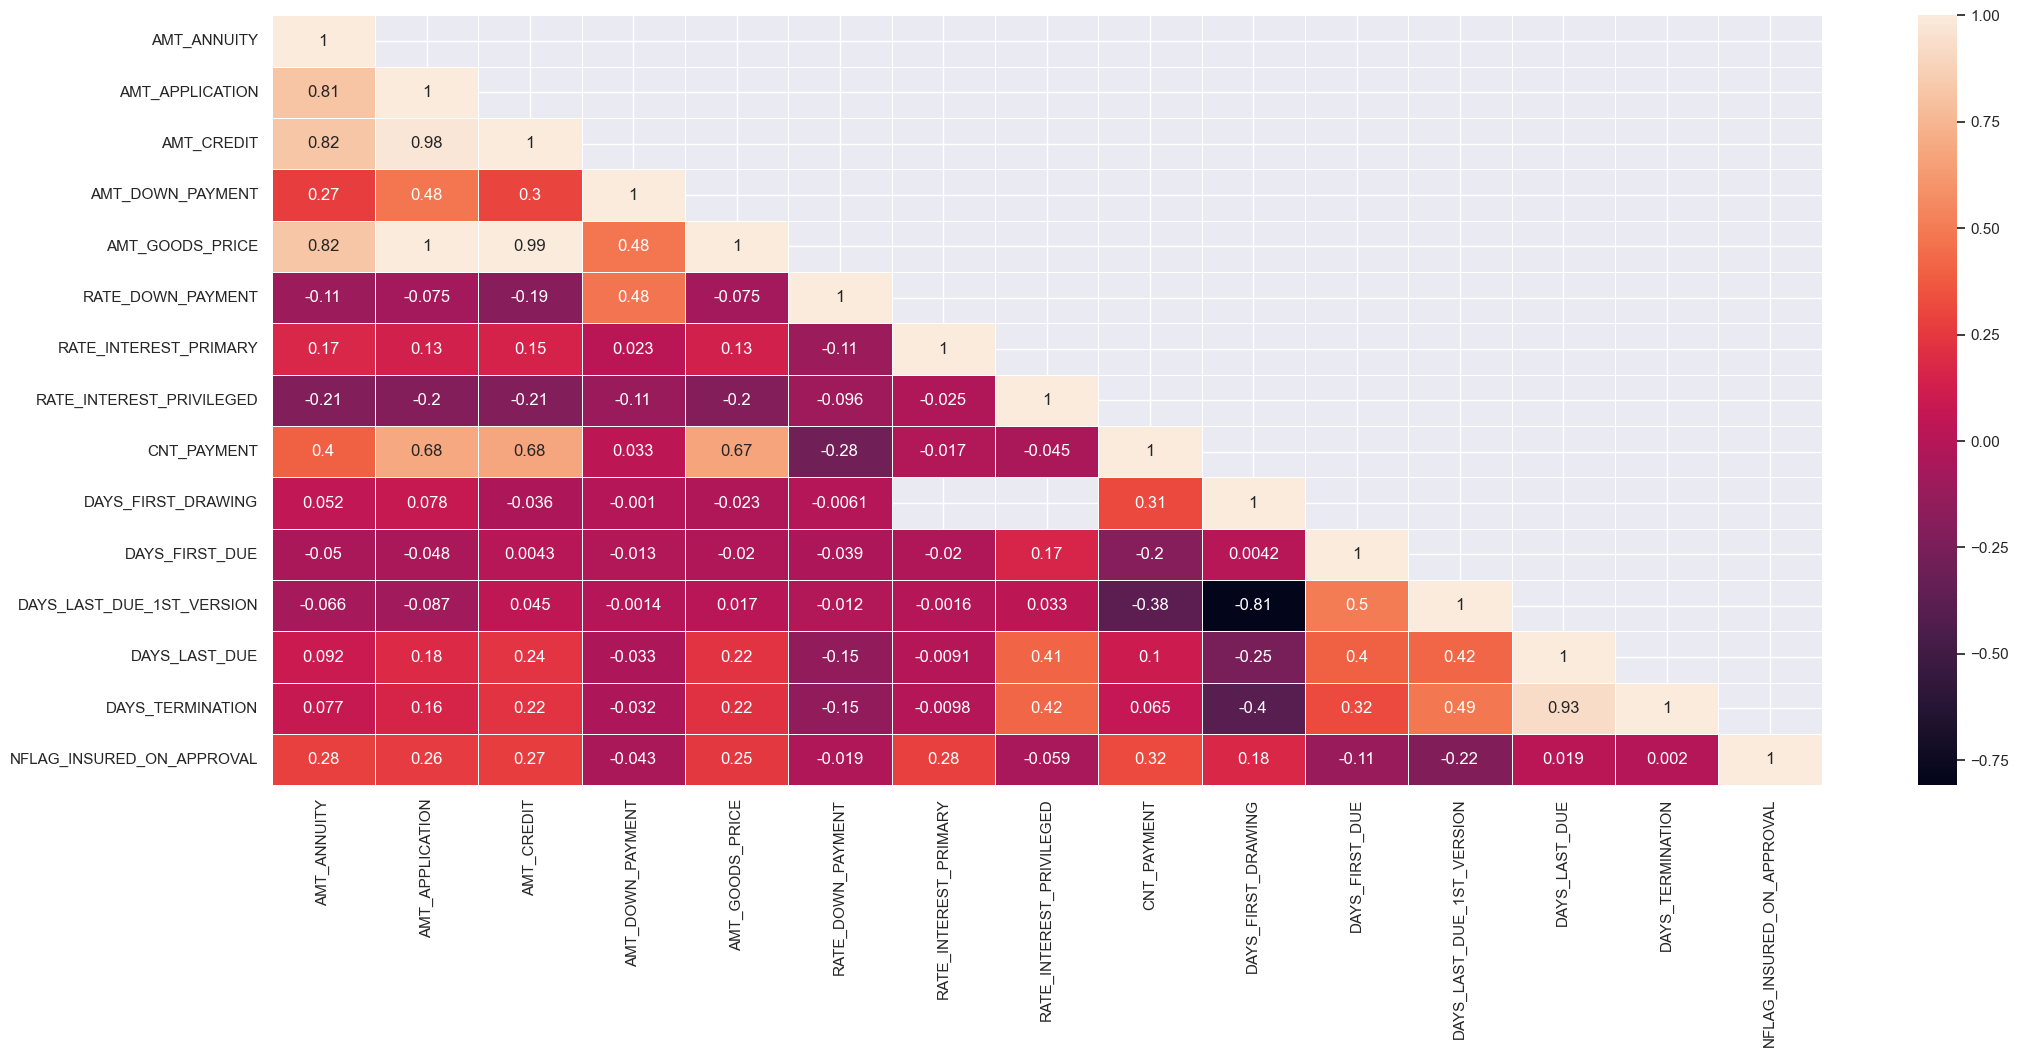

In [83]:
plt.figure(figsize=(25,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, linewidth=.5)

In [84]:
prev_df['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

#### For EDA purpose we are not removing them

In [85]:
prev_df_drop = prev_df.drop(["SK_ID_PREV"], axis=1)
prev_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_CONTRACT_TYPE           1413701 non-null  object 
 1   AMT_ANNUITY                  1106483 non-null  float64
 2   AMT_APPLICATION              1413701 non-null  float64
 3   AMT_CREDIT                   1413701 non-null  float64
 4   AMT_DOWN_PAYMENT             664161 non-null   float64
 5   AMT_GOODS_PRICE              1094176 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 7   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 10  RATE_DOWN_PAYMENT            664161 non-null   float64
 11  RATE_INTEREST_PRIMARY        4791 non-null     float64
 12  RATE_INTEREST_PRIVILEGED     4791 non-null

In [86]:
prev_df_merged = pd.merge(curr_df[["SK_ID_CURR", "TARGET"]], prev_df, how= "left", on=["SK_ID_CURR"])
prev_df_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,NaN,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,NaN,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,...,XNA,36.0,low_normal,Cash X-Sell: low,NaN,-756.0,294.0,-66.0,-64.0,0.0


In [87]:
prev_df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1144074.0,1.536874e+05,88690.498104,0.000000e+00,7.693800e+04,1.534235e+05,2.304430e+05,307510.000
TARGET,1144074.0,8.599881e-02,0.280362,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000
SK_ID_PREV,1130891.0,1.922902e+06,532760.240536,1.000001e+06,1.461216e+06,1.923091e+06,2.384279e+06,2845381.000
AMT_ANNUITY,885179.0,1.583839e+04,14737.532016,0.000000e+00,6.251985e+03,1.122750e+04,2.041663e+04,417927.645
AMT_APPLICATION,1130891.0,1.753341e+05,293861.443549,0.000000e+00,1.975050e+04,7.082550e+04,1.800000e+05,5850000.000
AMT_CREDIT,1130891.0,1.964466e+05,319665.056477,0.000000e+00,2.487600e+04,8.060850e+04,2.158065e+05,4509688.500
AMT_DOWN_PAYMENT,530908.0,6.684514e+03,21365.798806,-9.000000e-01,0.000000e+00,1.795500e+03,7.704000e+03,3060045.000
AMT_GOODS_PRICE,875347.0,2.265548e+05,316202.035308,0.000000e+00,4.975650e+04,1.102500e+05,2.295000e+05,5850000.000
HOUR_APPR_PROCESS_START,1130891.0,1.247646e+01,3.330394,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1130891.0,9.963905e-01,0.059971,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000


<Axes: ylabel='AMT_ANNUITY'>

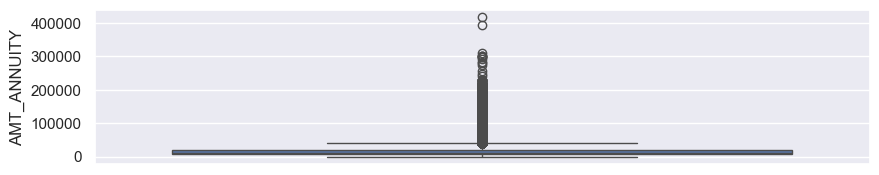

In [88]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_df_merged["AMT_ANNUITY"])

<Axes: ylabel='AMT_DOWN_PAYMENT'>

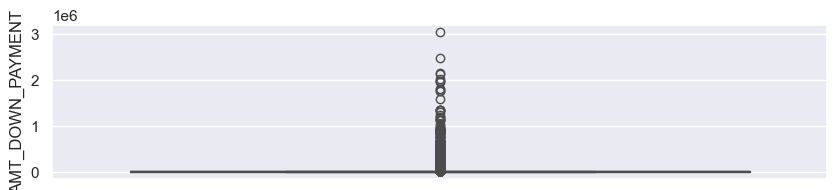

In [89]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_df_merged["AMT_DOWN_PAYMENT"])

New feature

In [90]:
# Separation of "WEEKDAY_APPR_PROCESS_START" variable into two categories as WEEK_DAY and WEEKEND

prev_df_merged["WEEKDAY_APPR_PROCESS_START"] = prev_df_merged["WEEKDAY_APPR_PROCESS_START"].replace(['MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY','FRIDAY'], 'WEEK_DAY')
prev_df_merged["WEEKDAY_APPR_PROCESS_START"] = prev_df_merged["WEEKDAY_APPR_PROCESS_START"].replace(['SATURDAY', 'SUNDAY'], 'WEEKEND')

# Separation of the "HOUR_APPR_PROCESS_START" variable into two categories: working_hours and off_hours
a = [8,9,10,11,12,13,14,15,16,17]
prev_df_merged["HOUR_APPR_PROCESS_START"] = prev_df_merged["HOUR_APPR_PROCESS_START"].replace(a, 'working_hours')

b = [18,19,20,21,22,23,0,1,2,3,4,5,6,7]
prev_df_merged["HOUR_APPR_PROCESS_START"] = prev_df_merged["HOUR_APPR_PROCESS_START"].replace(b, 'off_hours')


# DAYS_DECISION values less than 1 year were given the value 1, and those greater than 1 year were given the value 0.
prev_df_merged["DAYS_DECISION"] = [1 if abs(i/(12*30)) <=1 else 0 for i in prev_df_merged.DAYS_DECISION]

# Separating the "NAME_TYPE_SUITE" variable into two categories as alone and not_alone

prev_df_merged["NAME_TYPE_SUITE"] = prev_df_merged["NAME_TYPE_SUITE"].replace('Unaccompanied', 'alone')

b = ['Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']
prev_df_merged["NAME_TYPE_SUITE"] = prev_df_merged["NAME_TYPE_SUITE"].replace(b, 'not_alone')

# These values in the "NAME_GOODS_CATEGORY" variable will be categorized as others
a = ['Auto Accessories', 'Jewelry', 'Homewares', 'Medical Supplies', 'Vehicles', 'Sport and Leisure', 
        'Gardening', 'Other', 'Office Appliances', 'Tourism', 'Medicine', 'Direct Sales', 'Fitness', 'Additional Service', 
        'Education', 'Weapon', 'Insurance', 'House Construction', 'Animals'] 
prev_df_merged["NAME_GOODS_CATEGORY"] = prev_df_merged["NAME_GOODS_CATEGORY"].replace(a, 'others')

# "These values in the "NAME_SELLER_INDUSTRY" variable will be categorized as others
a = ['Auto technology', 'Jewelry', 'MLM partners', 'Tourism'] 
prev_df_merged["NAME_SELLER_INDUSTRY"] = prev_df_merged["NAME_SELLER_INDUSTRY"].replace(a, 'others')
# Derives the variable containing the ratio of the loan requested to the loan granted
prev_df_merged["LOAN_RATE"] = prev_df_merged.AMT_APPLICATION/prev_df_merged.AMT_CREDIT

# NEW VARIABLES

# Derives the variable containing the ratio of the loan requested to the loan granted
prev_df_merged["NEW_LOAN_RATE"] = prev_df_merged.AMT_APPLICATION/prev_df_merged.AMT_CREDIT

# The churn_prev variable is derived to indicate whether the payment date is late.
# 1= delayed, 0 = not delayed, NaN = null
k = prev_df_merged.DAYS_LAST_DUE_1ST_VERSION - prev_df_merged.DAYS_LAST_DUE
prev_df_merged["NEW_CHURN_PREV"] = [1 if i >= 0 else (0 if i < 0  else "NaN") for i in k]
prev_df_merged['AMT_DIFF_PERCENT'] = ((prev_df_merged['AMT_CREDIT'] - prev_df_merged['AMT_APPLICATION']) / prev_df_merged['AMT_APPLICATION']) * 100

#New features
prev_df_merged['PREVIOUS_TERM'] = prev_df_merged['AMT_CREDIT'] / prev_df_merged['AMT_ANNUITY']
prev_df_merged['PREVIOUS_AMT_TO_APPLICATION'] = prev_df_merged['AMT_CREDIT'] / prev_df_merged['AMT_APPLICATION']
prev_df_merged['PREVIOUS_CREDIT_TO_PRICE'] = prev_df_merged['AMT_GOODS_PRICE'] / prev_df_merged['AMT_CREDIT']
prev_df_merged['PREVIOUS_DAYSLASTDUE1ST_DAYSFIRSTDUE_DIFF'] = prev_df_merged['DAYS_LAST_DUE_1ST_VERSION'] - prev_df_merged['DAYS_FIRST_DUE']
prev_df_merged['PREVIOUS_DAYSLASTDUE_DAYSFIRSTDUE_DIFF'] = prev_df_merged['DAYS_LAST_DUE'] - prev_df_merged['DAYS_FIRST_DUE']
prev_df_merged['PREVIOUS_DAYSLASTDUE_DAYSLASTDUE1ST_DIFF'] = prev_df_merged['DAYS_LAST_DUE'] - prev_df_merged['DAYS_LAST_DUE_1ST_VERSION']



#INTEREST CALCULATED FOR THE ENTIRE LOAN TERM
prev_df_merged['INTEREST'] = prev_df_merged['CNT_PAYMENT']*prev_df_merged['AMT_ANNUITY'] - prev_df_merged['AMT_CREDIT']
#INTEREST_RATE converts the interest into an annual rate. Since there are 12 months in a year, multiplying by 2 and 12 ensures the interest rate is expressed as a percentage per year.
prev_df_merged['INTEREST_RATE'] = 2*12*prev_df_merged['INTEREST']/(prev_df_merged['AMT_CREDIT']*(prev_df_merged['CNT_PAYMENT']+1))
prev_df_merged['INTEREST_SHARE'] = prev_df_merged['INTEREST']/prev_df_merged['AMT_CREDIT']

In [91]:
total_approved = prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = prev_df_merged[(prev_df_merged["NAME_CONTRACT_STATUS"] == "Approved") & (prev_df_merged["TARGET"] == 1)].shape[0]

print(f"Default percentage of whom has been approved the previous application: {default_approved/total_approved * 100}")

Default percentage of whom has been approved the previous application: 7.583832968893278


In [92]:
total_refused = prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = prev_df_merged[(prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused") & (prev_df_merged["TARGET"] == 0)].shape[0]

print(f"Non-default percentage of whom has been refused the previous application: {nondefault_refused/total_refused * 100}")

Non-default percentage of whom has been refused the previous application: 88.08011176488584


In [93]:
print(prev_df_merged[prev_df_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))
print(prev_df_merged[prev_df_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))

0.50    0.067511
0.70    0.108909
0.90    0.212423
0.95    0.300528
0.99    0.523630
Name: RATE_DOWN_PAYMENT, dtype: float64
0.50    0.000000
0.70    0.103968
0.90    0.200064
0.95    0.238156
0.99    0.481678
Name: RATE_DOWN_PAYMENT, dtype: float64


#### Customer with lower rate down payment has higher default rate

Analyzie categorical features

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

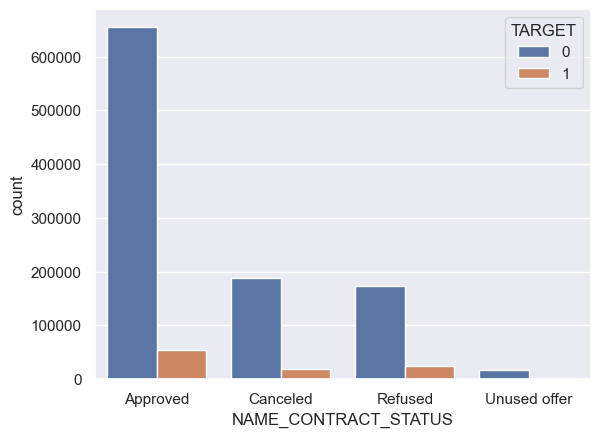

In [94]:
sns.countplot(data=prev_df_merged,x=prev_df_merged['NAME_CONTRACT_STATUS'], hue='TARGET', )


<BarContainer object of 4 artists>

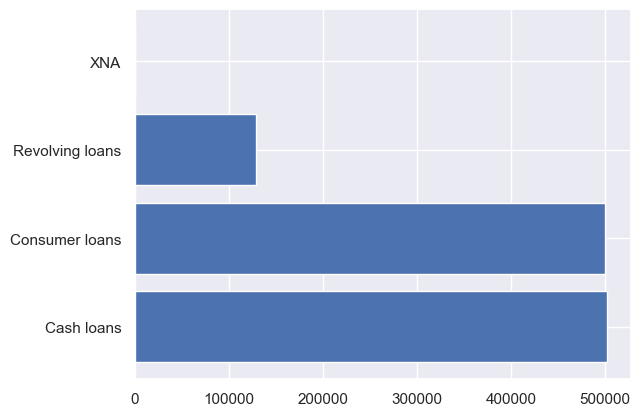

In [95]:
plt.barh(prev_df_merged["NAME_CONTRACT_TYPE"].value_counts().index, prev_df_merged["NAME_CONTRACT_TYPE"].value_counts().values)


###### Most of the loans are cash loans and consumer loans

<Axes: xlabel='CODE_REJECT_REASON', ylabel='count'>

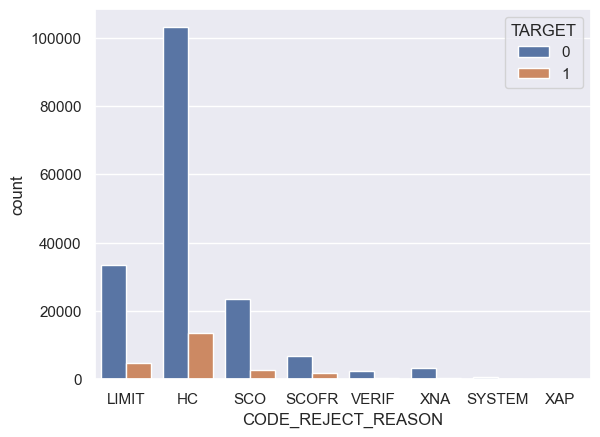

In [96]:
# sns.countplot(prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue= prev_df_merged["TARGET"])
sns.countplot(data=prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"],x=prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue='TARGET', )


In [97]:
prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].value_counts()

CODE_REJECT_REASON
HC        116812
LIMIT      38037
SCO        26096
SCOFR       8697
XNA         3516
VERIF       2452
SYSTEM       515
XAP            1
Name: count, dtype: int64

###### "SCO", "LIMIT", "HC" are thress most common reasons

<BarContainer object of 4 artists>

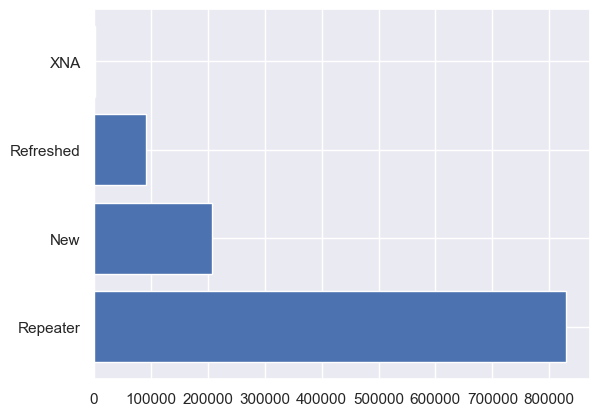

In [98]:
plt.barh(prev_df_merged["NAME_CLIENT_TYPE"].value_counts().index, prev_df_merged["NAME_CLIENT_TYPE"].value_counts().values)


Most of the customers are repeaters (loyal customers)

<BarContainer object of 4 artists>

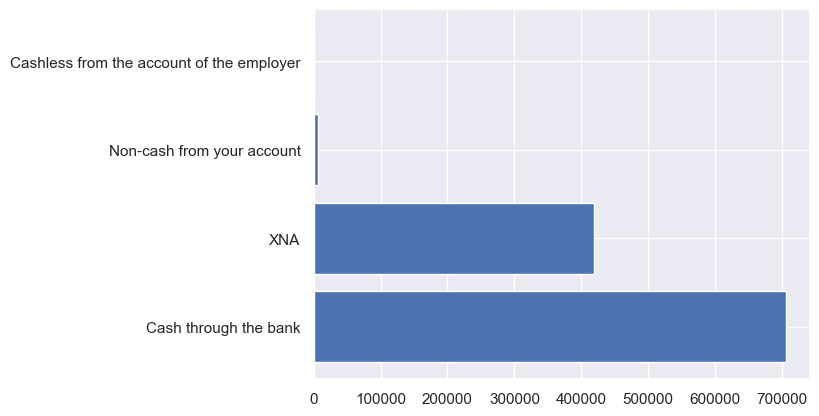

In [99]:
plt.barh(prev_df_merged["NAME_PAYMENT_TYPE"].value_counts().index, prev_df_merged["NAME_PAYMENT_TYPE"].value_counts().values)


#### Cash through bank is the most common payment type

In [100]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        if total_count == 0:
            pass
        else:
            summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

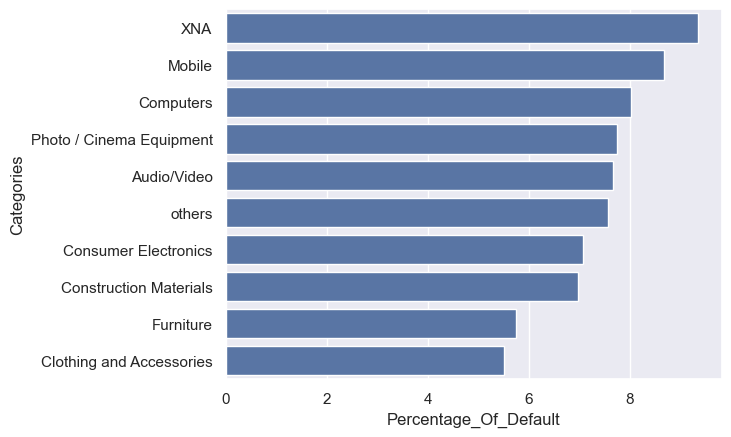

In [101]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_GOODS_CATEGORY"), y= "Categories", x= "Percentage_Of_Default")

Customers buying XNA and Mobile has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

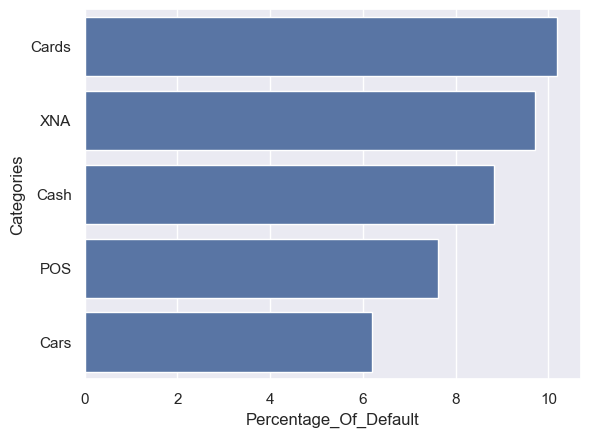

In [102]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_PORTFOLIO"), y= "Categories", x= "Percentage_Of_Default")
## Cards has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

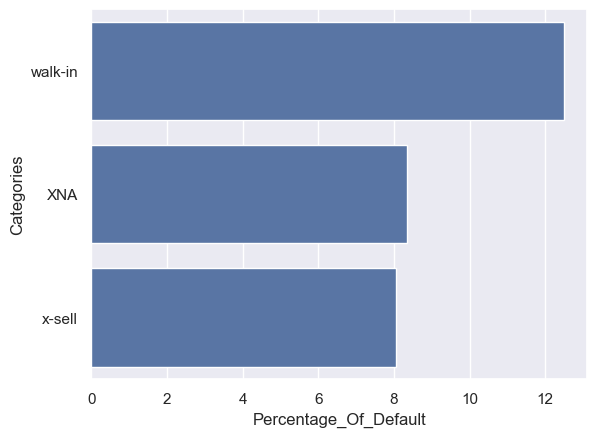

In [103]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_PRODUCT_TYPE"), y= "Categories", x= "Percentage_Of_Default")
## walk-in customers has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

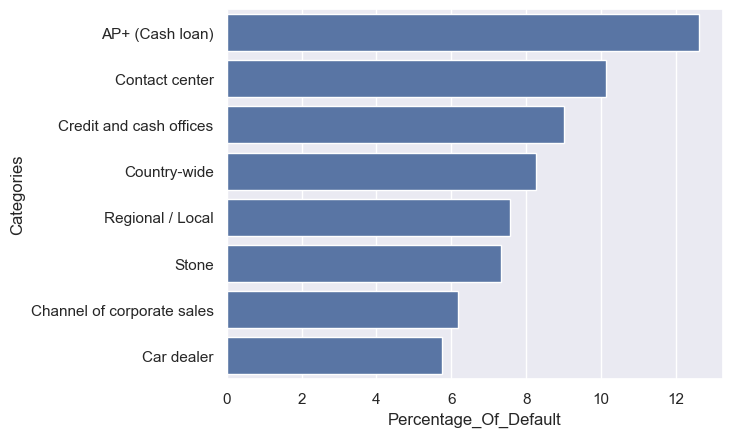

In [104]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "CHANNEL_TYPE"), y= "Categories", x= "Percentage_Of_Default")
## Cash loan has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

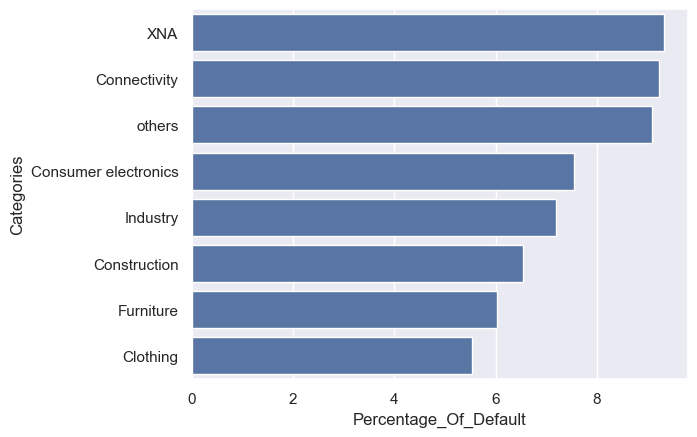

In [105]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_SELLER_INDUSTRY"), y= "Categories", x= "Percentage_Of_Default")
## Auto technology has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

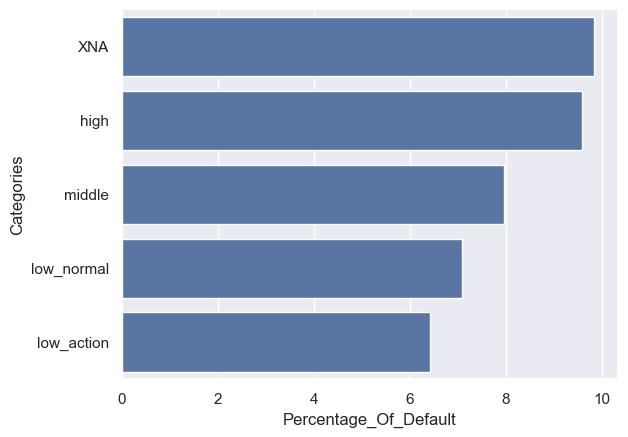

In [106]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_YIELD_GROUP"), y= "Categories", x= "Percentage_Of_Default")
## XNA has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

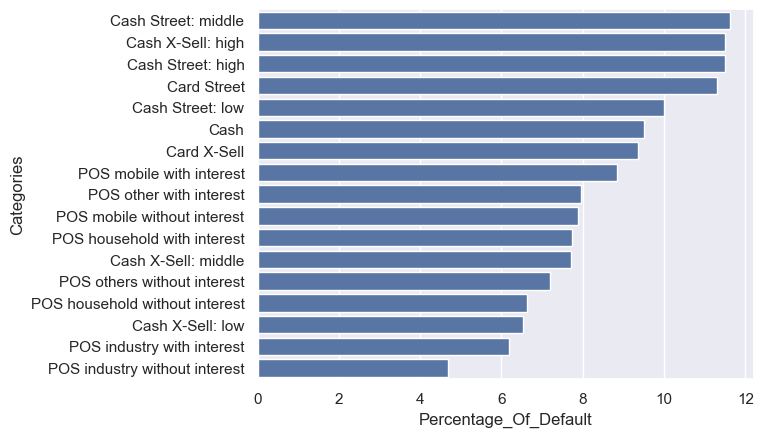

In [107]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "PRODUCT_COMBINATION"), y= "Categories", x= "Percentage_Of_Default")
## Cash Street: middle has highest percentage of default

<Axes: xlabel='Percentage_Of_Default', ylabel='Categories'>

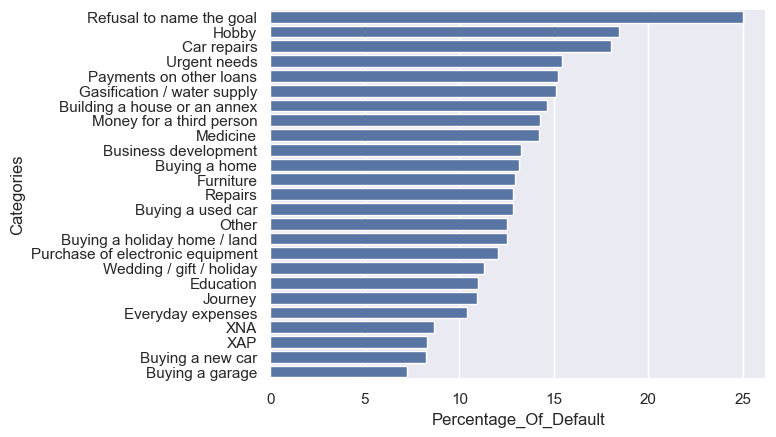

In [108]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_CASH_LOAN_PURPOSE"), y= "Categories", x= "Percentage_Of_Default")
## Refusal to name the goal and Hobby has highest of default

In [109]:
import scorecardpy as sc
filtered = prev_df_merged[['TARGET','INTEREST','INTEREST_RATE','INTEREST_SHARE','LOAN_RATE']]


[INFO] creating woe binning ...
Binning on 1144074 rows and 5 columns in 00:00:30


{'LOAN_RATE': <Figure size 640x480 with 2 Axes>,
 'INTEREST_SHARE': <Figure size 640x480 with 2 Axes>,
 'INTEREST': <Figure size 640x480 with 2 Axes>,
 'INTEREST_RATE': <Figure size 640x480 with 2 Axes>}

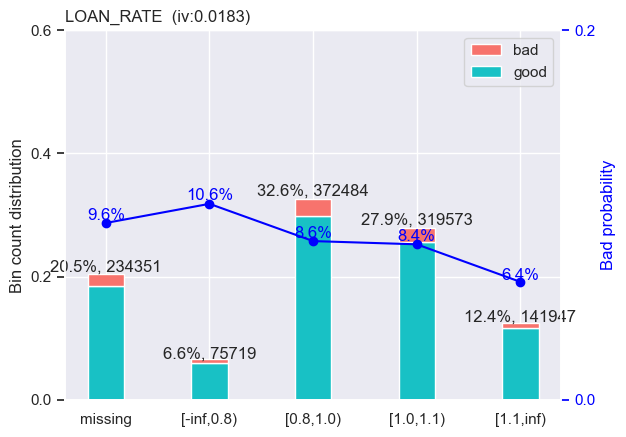

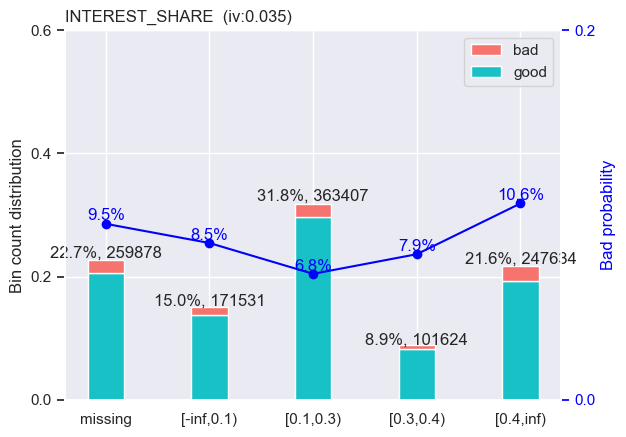

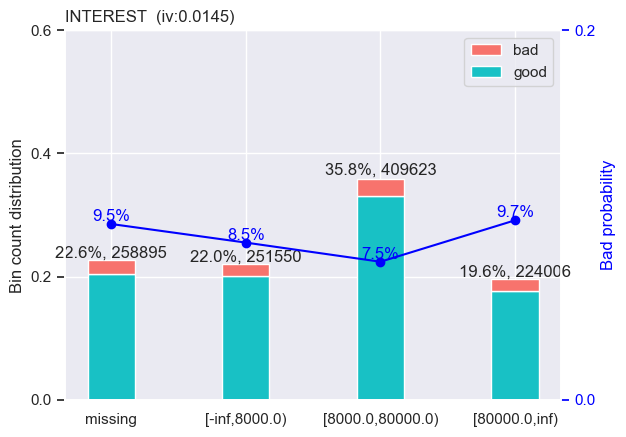

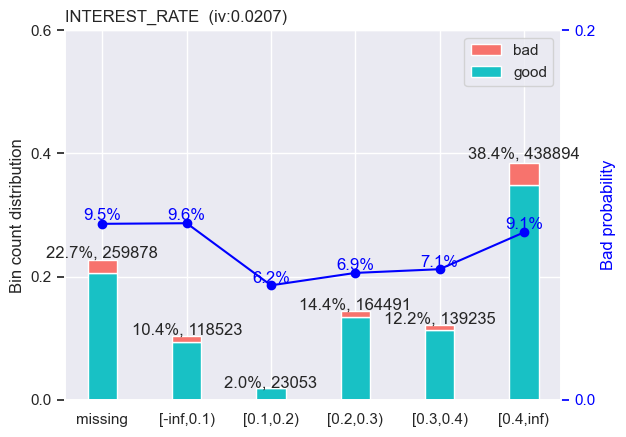

In [110]:
# woe binning ------
# bins = sc.woebin(filtered, y="TARGET")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'INTEREST': ["missing",8000, 80000],
    'INTEREST_RATE': ["missing",  0.1,  0.2, 0.3,  0.4],
    'INTEREST_SHARE': ["missing",0.1,  0.3,  0.4],
    'LOAN_RATE': ["missing",  0.8,  1.0, 1.1]
}
bins = sc.woebin(filtered[['TARGET','INTEREST','INTEREST_RATE','INTEREST_SHARE','LOAN_RATE']], y="TARGET", breaks_list = breaks_adj
)
sc.woebin_plot(bins)

When interest is at the highest or the lowest, the default rate is highest. 

Higher loan rate, the default rate is higher